In [ ]:
# Data Wrangling II
# Create an "Academic performance" dataset of students and perform the following operations using Python.
# 1. Scan allvariables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal withthem.
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal withthem.
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normaldistribution.
# Reason and document your approach properly.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Load the dataset
dataset = pd.read_csv("StudentsPerformance_modified.csv")

In [3]:
# Display the first 5 rows of the dataset
print(dataset.head())
print("-" * 100)

# Display the information of the dataset
print(dataset.info())
print("-" * 100)

# Display the summary statistics of the dataset
print(dataset.describe())
print("-" * 100)

# Display the number of missing values in the dataset
print(dataset.isnull().sum())
print("-" * 100)

# Display the data types of the variables in the dataset
print(dataset.dtypes)
print("-" * 100)

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course math score  reading score  writing score  
0                    none         72           72.0           74.0  
1               completed         69           90.0           88.0  
2                    none         90           95.0           93.0  
3                    none         47           57.0           44.0  
4                    none         76           78.0           75.0  
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 

In [4]:
# As we can see the datatype of math score is object, we need to convert it to float
# dataset["math score"] = dataset["math score"].astype(float) # This will throw an error as the data consists of '?' values

# Replace '?' with NaN
dataset["math score"] = dataset["math score"].replace("?", np.nan)

# Convert the datatype of math score to float
dataset["math score"] = dataset["math score"].astype(float)

dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [5]:
# Dealing with missing values:

#dropna(): Drops rows or columns containing missing values.
#fillna(): Fills missing values with specified methods or values.

test = dataset.dropna()
test.info()

# dataset.dropna(inplace=True) # Drop rows with missing values inplace in the original dataset


# Fill missing values with the mean of the column
dataset["math score"] = dataset["math score"].fillna(dataset["math score"].mean())

# Fill missing values with the median of the column
dataset["reading score"] = dataset["reading score"].fillna(dataset["reading score"].median())

# Fill missing values with the mode of the column
dataset["writing score"] = dataset["writing score"].fillna(dataset["writing score"].mode()[0])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       943 non-null    object 
 1   race/ethnicity               943 non-null    object 
 2   parental level of education  943 non-null    object 
 3   lunch                        943 non-null    object 
 4   test preparation course      943 non-null    object 
 5   math score                   943 non-null    float64
 6   reading score                943 non-null    float64
 7   writing score                943 non-null    float64
dtypes: float64(3), object(5)
memory usage: 66.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null

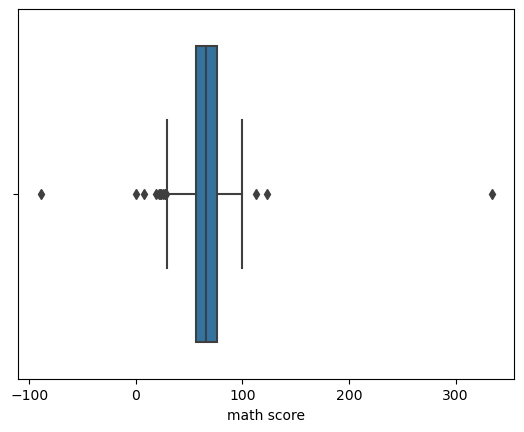

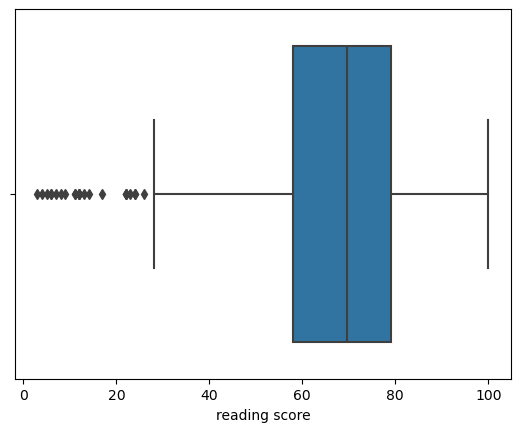

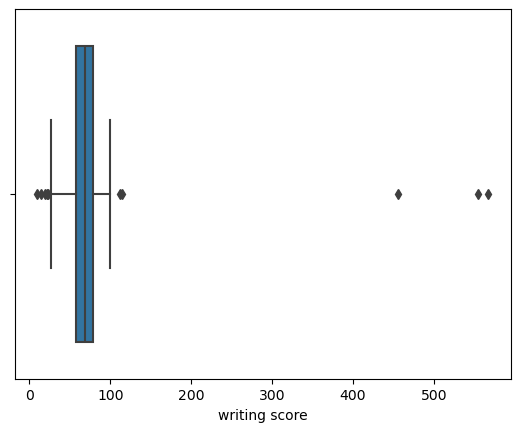

In [6]:
# Outlier Detection:
# Outliers are extreme values that deviate from other observations in the dataset. They may indicate a variability in a measurement, experimental errors, or a novelty. Outliers can have a disproportionate effect on statistical analysis, which can lead to misleading interpretations. Therefore, it is important to detect and deal with outliers in the dataset.

# For visualizing outliers, we can use library like seaborn to create boxplots. 
# Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. 

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=dataset["math score"])
plt.show()

sns.boxplot(x=dataset["reading score"])
plt.show()

sns.boxplot(x=dataset["writing score"])
plt.show()

Max threshold for math score: 90.04999999999995
Min threshold for math score: 40.95
<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       900 non-null    object 
 1   race/ethnicity               900 non-null    object 
 2   parental level of education  900 non-null    object 
 3   lunch                        900 non-null    object 
 4   test preparation course      900 non-null    object 
 5   math score                   900 non-null    float64
 6   reading score                900 non-null    float64
 7   writing score                900 non-null    float64
dtypes: float64(3), object(5)
memory usage: 63.3+ KB


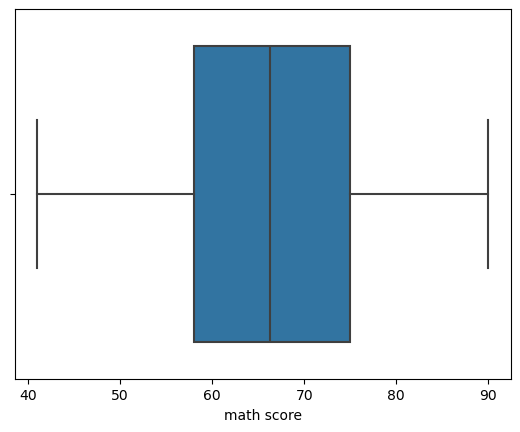

In [7]:
# Method 1: Percentile-based outlier detection
# YT video: https://www.youtube.com/watch?v=7sJaRHF03K8# Percentile-based outlier detection is a statistical method used to detect outliers in the dataset. It involves calculating the lower and upper bounds of the data based on the percentiles and identifying the values that fall outside these bounds as outliers.

max_threshold = dataset["math score"].quantile(0.95)
print(f"Max threshold for math score: {max_threshold}")

min_threshold = dataset["math score"].quantile(0.05)
print(f"Min threshold for math score: {min_threshold}")

# print(dataset[dataset["math score"] > max_threshold]) # Display the rows where math score is greater than the max threshold
# print(dataset[dataset["math score"] < min_threshold]) # Display the rows where math score is less than the min threshold

# Remove outliers
dataset = dataset[(dataset["math score"] < max_threshold) & (dataset["math score"] > min_threshold)]

dataset.info()

sns.boxplot(x=dataset["math score"])
plt.show()


<Axes: xlabel='reading score'>

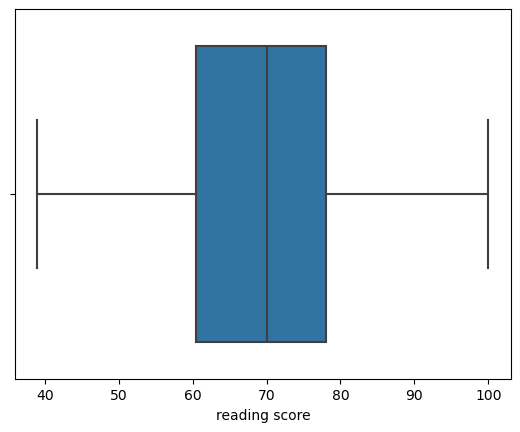

In [21]:
# Method 2: Z-score method
# Z-score is a standardized score that indicates how many standard deviations a data point is from the mean. It is calculated as the difference between a data point and the mean divided by the standard deviation.
# Z = (X - μ) / σ
# where X is the data point, μ is the mean, and σ is the standard deviation.
# YT video for Z-score: https://www.youtube.com/watch?v=KFuEAGR3HS4

z = (dataset["reading score"] - dataset["reading score"].mean()) / dataset["reading score"].std()

dataset = dataset[(z < 3) & (z > -3)] # Keep only the data points within 3 standard deviations

sns.boxplot(x=dataset["reading score"])


<Axes: xlabel='writing score'>

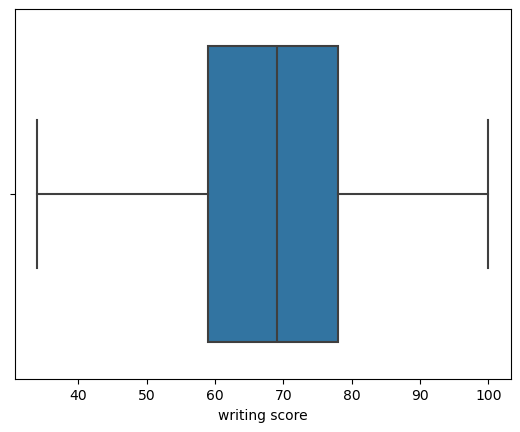

In [24]:
# Method 3: IQR (Interquartile Range) method
# IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data. It is calculated as:
# IQR = Q3 - Q1
# Outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
# YT video for IQR: https://www.youtube.com/watch?v=A3gClkblXK8

Q1 = dataset["writing score"].quantile(0.25)
Q3 = dataset["writing score"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[(dataset["writing score"] > lower_bound) & (dataset["writing score"] < upper_bound)]

sns.boxplot(x=dataset["writing score"])


In [26]:
# Data Transformation:
# Data transformation is the process of converting data from one form to another to make it suitable for analysis. It involves changing the scale, converting non-linear relationships into linear ones, and reducing skewness to make the distribution normal.

# Method 1 : Min-Max Scaling:
# Min-Max scaling is a technique used to scale the data between 0 and 1. It is calculated as:
# X_scaled = (X - X_min) / (X_max - X_min)
# where X is the data point, X_min is the minimum value, and X_max is the maximum value.

# Apply Min-Max scaling to the math score variable
dataset["math score_scaled"] = (dataset["math score"] - dataset["math score"].min()) / (dataset["math score"].max() - dataset["math score"].min())

# Display the first 5 rows of the dataset with the scaled math score
print(dataset[["math score", "math score_scaled"]].head())


# Method 2: Z Score Normalization(Standardization)
# Z-score normalization is a technique used to standardize the data by transforming it into a standard normal distribution with a mean of 0 and a standard deviation of 1. It is calculated as:
# Z = (X - μ) / σ
# where X is the data point, μ is the mean, and σ is the standard deviation.

# Apply Z-score normalization to the reading score variable
dataset["reading score_normalized"] = (dataset["reading score"] - dataset["reading score"].mean()) / dataset["reading score"].std()

# Display the first 5 rows of the dataset with the normalized reading score
print(dataset[["reading score", "reading score_normalized"]].head())

   math score  math score_scaled
0        72.0           0.632653
1        69.0           0.571429
2        90.0           1.000000
3        47.0           0.122449
4        76.0           0.714286
   reading score  reading score_normalized
0           72.0                  0.202035
1           90.0                  1.642119
2           95.0                  2.042142
3           57.0                 -0.998035
4           78.0                  0.682063
